In [108]:
import pandas as pd

In [109]:
TC=pd.read_csv("/content/drive/MyDrive/complaints.csv")

<ipython-input-109-e21d52310572>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  TC=pd.read_csv("/content/drive/MyDrive/complaints.csv")


#Steps to follow

##1.Data Cleaning
##2.EDA(Exploratory Data Analysis)
##3.Text Preprocessing
##4.Model Building
##5.Evaluation & Improvement



# 1.Data Cleaning

In [110]:
TC['Product'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Credit reporting or other personal consumer reports',
       'Checking or savings account', 'Debt collection', 'Credit card',
       'Prepaid card', 'Mortgage',
       'Payday loan, title loan, personal loan, or advance loan',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease', 'Debt or credit management',
       'Bank account or service', 'Consumer Loan', 'Credit reporting',
       'Money transfers', 'Payday loan', 'Other financial service',
       'Virtual currency'], dtype=object)

### We will take product,issue Columns for the analysis



####For Catergory 0 - Credit reporting,repair or other

In [111]:

import pandas as pd


data = TC['Product']
df = pd.DataFrame(data)

condition1 = df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports'
condition2 = df['Product'] == 'Credit card or prepaid card'
condition3 = df['Product'] == 'Credit reporting or other personal consumer reports'
condition4 = df['Product'] == 'Checking or savings account'
condition5 = df['Product'] == 'Credit card'
condition6 = df['Product'] == 'Prepaid card'
condition7 = df['Product'] == 'Bank account or service'
condition8 = df['Product'] == 'Credit reporting'
condition9 = df['Product'] == 'Other financial service'

sentence_to_set = "Credit Reporting ,repair or other"
df.loc[condition1 | condition2 |condition3|condition4|condition5|condition6|condition7|condition8|condition9 , 'Product'] = sentence_to_set


print(df)


                                   Product
0        Credit Reporting ,repair or other
1        Credit Reporting ,repair or other
2        Credit Reporting ,repair or other
3        Credit Reporting ,repair or other
4        Credit Reporting ,repair or other
...                                    ...
4086372  Credit Reporting ,repair or other
4086373  Credit Reporting ,repair or other
4086374                           Mortgage
4086375                    Debt collection
4086376  Credit Reporting ,repair or other

[4086377 rows x 1 columns]


####for Category 1- Debt collection

In [112]:

import pandas as pd

data = df['Product']
df1 = pd.DataFrame(data)


condition1 = df['Product'] == 'Debt collection'
condition2 = df['Product'] == 'Debt or credit management'


sentence_to_set = "Debt Collection"
df1.loc[condition1 | condition2, 'Product'] = sentence_to_set


print(df1)


                                   Product
0        Credit Reporting ,repair or other
1        Credit Reporting ,repair or other
2        Credit Reporting ,repair or other
3        Credit Reporting ,repair or other
4        Credit Reporting ,repair or other
...                                    ...
4086372  Credit Reporting ,repair or other
4086373  Credit Reporting ,repair or other
4086374                           Mortgage
4086375                    Debt Collection
4086376  Credit Reporting ,repair or other

[4086377 rows x 1 columns]


####for Category 2- Consumer Loan

In [113]:

import pandas as pd

data = df1['Product']
df2 = pd.DataFrame(data)


condition1 = df1['Product'] == 'Payday loan, title loan, personal loan, or advance loan'
condition2 = df1['Product'] == 'Student loan'
condition3 = df1['Product'] == 'Money transfer, virtual currency, or money service'
condition4 = df1['Product'] == 'Payday loan, title loan, or personal loan'
condition5 = df1['Product'] == 'Vehicle loan or lease'
condition6 = df1['Product'] == 'Consumer Loan'
condition7 = df1['Product'] == 'Payday loan'
condition8 = df1['Product'] == 'Virtual currency'
condition9 = df1['Product'] == 'Money transfers'

sentence_to_set = "Consumer Loan"
df2.loc[condition1 | condition2 |condition3|condition4|condition5|condition6|condition7|condition8|condition9, 'Product'] = sentence_to_set


print(df2)


                                   Product
0        Credit Reporting ,repair or other
1        Credit Reporting ,repair or other
2        Credit Reporting ,repair or other
3        Credit Reporting ,repair or other
4        Credit Reporting ,repair or other
...                                    ...
4086372  Credit Reporting ,repair or other
4086373  Credit Reporting ,repair or other
4086374                           Mortgage
4086375                    Debt Collection
4086376  Credit Reporting ,repair or other

[4086377 rows x 1 columns]


In [114]:
TC['Product']=df2

In [115]:
TC['Product'].nunique()

4

In [116]:
TC['Product'].unique()

array(['Credit Reporting ,repair or other', 'Debt Collection', 'Mortgage',
       'Consumer Loan'], dtype=object)

###Label Mapping
  ### 0- credit reporting,repair & other
  ### 1-Debt collection
  ### 2-consumer loan
  ### 3-Mortgage




In [117]:

data = TC['Product']
df3 = pd.DataFrame(data)

label_mapping = {
    'Credit Reporting ,repair or other': '0',
    'Debt Collection': '1',
    'Consumer Loan': '2',
    'Mortgage': '3'
}


df3['Label'] = TC['Product'].map(label_mapping)


print(df3)


                                   Product Label
0        Credit Reporting ,repair or other     0
1        Credit Reporting ,repair or other     0
2        Credit Reporting ,repair or other     0
3        Credit Reporting ,repair or other     0
4        Credit Reporting ,repair or other     0
...                                    ...   ...
4086372  Credit Reporting ,repair or other     0
4086373  Credit Reporting ,repair or other     0
4086374                           Mortgage     3
4086375                    Debt Collection     1
4086376  Credit Reporting ,repair or other     0

[4086377 rows x 2 columns]


In [118]:
TC['Product'] = df3['Label']

In [119]:
TC=TC[['Product','Issue']]

In [120]:
TC.isnull().sum()

Product    0
Issue      0
dtype: int64

In [121]:
TC['Issue'].duplicated().sum()

4086201

In [122]:

data =TC
df4 = pd.DataFrame(data)


df4.rename(columns={'Product': 'Categories'}, inplace=True)

print(df4)


        Categories                                              Issue
0                0  Problem with a credit reporting company's inve...
1                0    Problem with a purchase shown on your statement
2                0                        Improper use of your report
3                0             Problem caused by your funds being low
4                0  Problem with a credit reporting company's inve...
...            ...                                                ...
4086372          0                                    Sale of account
4086373          0             Incorrect information on credit report
4086374          3  Applying for a mortgage or refinancing an exis...
4086375          1                  Attempts to collect debt not owed
4086376          0                                Managing an account

[4086377 rows x 2 columns]


In [123]:
TC=df4

In [124]:
TC['Labels'] = df3['Product']

# 2.Exploratory Data Analysis(EDA) & Feature Engineering

In [125]:
TC['Categories'].value_counts()

0    2939555
1     506405
3     384089
2     256328
Name: Categories, dtype: int64

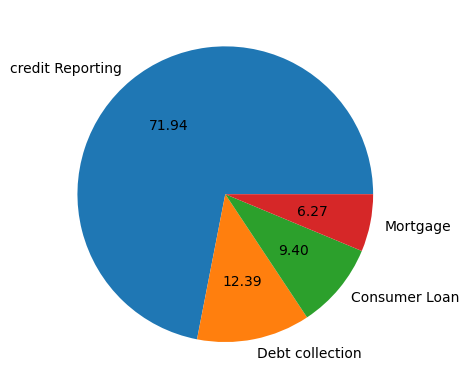

In [126]:
import matplotlib.pyplot as plt
plt.pie(TC['Categories'].value_counts(),labels=['credit Reporting','Debt collection','Consumer Loan','Mortgage'],autopct="%0.2f")
plt.show()

In [127]:
import nltk

In [128]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
TC['Issue_Characters']= TC['Issue'].apply(len)

In [130]:
TC.head()

,Categories,Issue,Labels,Issue_Characters
0,0,Problem with a credit reporting company's inve...,"Credit Reporting ,repair or other",80
1,0,Problem with a purchase shown on your statement,"Credit Reporting ,repair or other",47
2,0,Improper use of your report,"Credit Reporting ,repair or other",27
3,0,Problem caused by your funds being low,"Credit Reporting ,repair or other",38
4,0,Problem with a credit reporting company's inve...,"Credit Reporting ,repair or other",80


In [131]:
TC['Issue_words']=TC['Issue'].apply(lambda x:len(nltk.word_tokenize(x)))

In [132]:
TC['Issue_sentence']=TC['Issue'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [133]:
#taking 1 Lakh sentences instead of 40 lakh sentences for better representation
TC[['Issue_Characters','Issue_words','Issue_sentence']].iloc[:100000].describe()

,Issue_Characters,Issue_words,Issue_sentence
count,100000.000000,100000.000000,100000.000000
mean,40.704620,6.302660,1.000090
std,17.639514,2.661621,0.009486
min,4.000000,1.000000,1.000000
25%,27.000000,5.000000,1.000000
50%,36.000000,5.000000,1.000000
75%,40.000000,7.000000,1.000000
max,80.000000,16.000000,2.000000


In [134]:
TC.isnull().sum()

Categories          0
Issue               0
Labels              0
Issue_Characters    0
Issue_words         0
Issue_sentence      0
dtype: int64

In [135]:
#category 0- credit reporting ,repair and others
TC[TC['Labels']=='Credit Reporting ,repair or other'][['Issue_Characters','Issue_words','Issue_sentence']].iloc[:100000].describe()

,Issue_Characters,Issue_words,Issue_sentence
count,100000.000000,100000.000000,100000.000000
mean,41.948320,6.447500,1.000220
std,18.846072,2.811662,0.014831
min,4.000000,1.000000,1.000000
25%,27.000000,5.000000,1.000000
50%,36.000000,5.000000,1.000000
75%,48.000000,8.000000,1.000000
max,80.000000,12.000000,2.000000


In [136]:
#category 1- Debt Collection
TC[TC['Labels']=='Debt Collection'][['Issue_Characters','Issue_words','Issue_sentence']].describe()

,Issue_Characters,Issue_words,Issue_sentence
count,506405.000000,506405.000000,506405.0
mean,33.469504,5.275635,1.0
std,7.071830,1.789356,0.0
min,21.000000,2.000000,1.0
25%,31.000000,4.000000,1.0
50%,33.000000,6.000000,1.0
75%,34.000000,6.000000,1.0
max,61.000000,9.000000,1.0


In [137]:
#category 2- Consumer Loan'
TC[TC['Labels']=='Consumer Loan'][['Issue_Characters','Issue_words','Issue_sentence']].describe()

,Issue_Characters,Issue_words,Issue_sentence
count,256328.000000,256328.000000,256328.0
mean,31.316887,5.600543,1.0
std,11.792060,1.976741,0.0
min,12.000000,1.000000,1.0
25%,25.000000,5.000000,1.0
50%,29.000000,5.000000,1.0
75%,36.000000,6.000000,1.0
max,80.000000,16.000000,1.0


In [138]:
#category 3-Mortgage
TC[TC['Labels']=='Mortgage'][['Issue_Characters','Issue_words','Issue_sentence']].describe()

,Issue_Characters,Issue_words,Issue_sentence
count,384089.000000,384089.000000,384089.0
mean,36.019160,5.546373,1.0
std,9.226585,1.572494,0.0
min,5.000000,1.000000,1.0
25%,30.000000,4.000000,1.0
50%,40.000000,6.000000,1.0
75%,40.000000,7.000000,1.0
max,80.000000,12.000000,1.0


In [139]:
import seaborn as sns

<Axes: xlabel='Issue_Characters', ylabel='Count'>

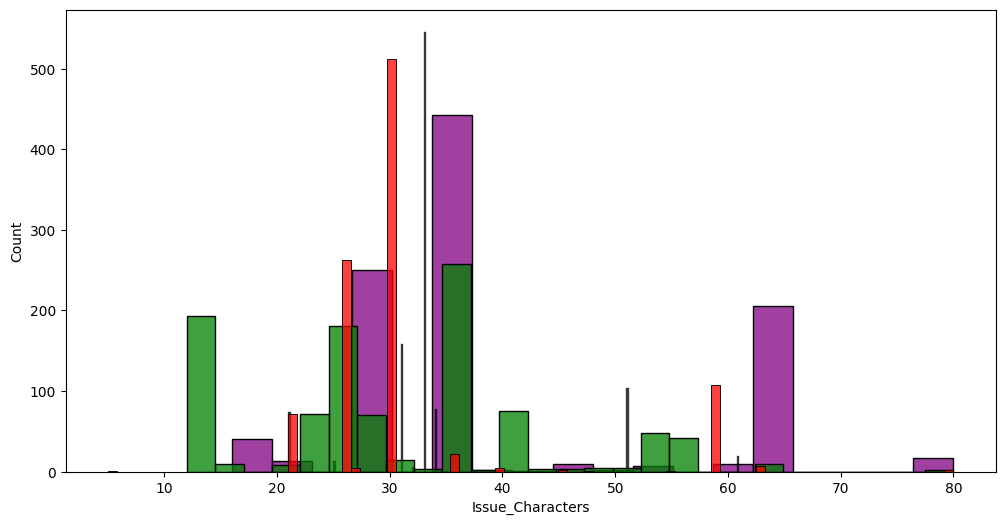

In [140]:
plt.figure(figsize=(12,6))
sns.histplot(TC[TC['Categories']=='0']['Issue_Characters'].iloc[:1000],color='purple')
sns.histplot(TC[TC['Categories']=='1']['Issue_Characters'].iloc[:1000],color='black')
sns.histplot(TC[TC['Categories']=='2']['Issue_Characters'].iloc[:1000],color='green')
sns.histplot(TC[TC['Categories']=='3']['Issue_Characters'].iloc[:1000],color='red')

<Axes: xlabel='Issue_words', ylabel='Count'>

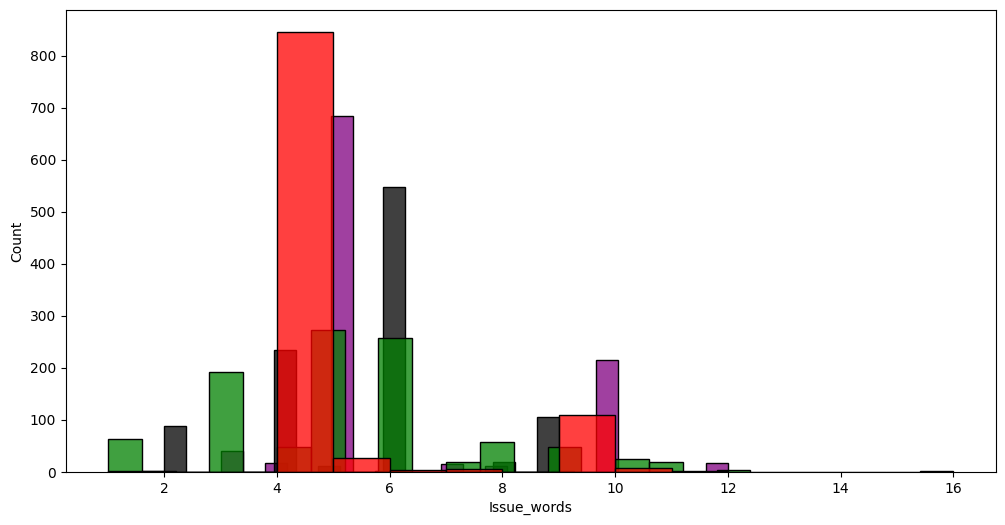

In [141]:
plt.figure(figsize=(12,6))
sns.histplot(TC[TC['Categories']=='0']['Issue_words'].iloc[:1000],color='purple')
sns.histplot(TC[TC['Categories']=='1']['Issue_words'].iloc[:1000],color='black')
sns.histplot(TC[TC['Categories']=='2']['Issue_words'].iloc[:1000],color='green')
sns.histplot(TC[TC['Categories']=='3']['Issue_words'].iloc[:1000],color='red')

<Axes: >

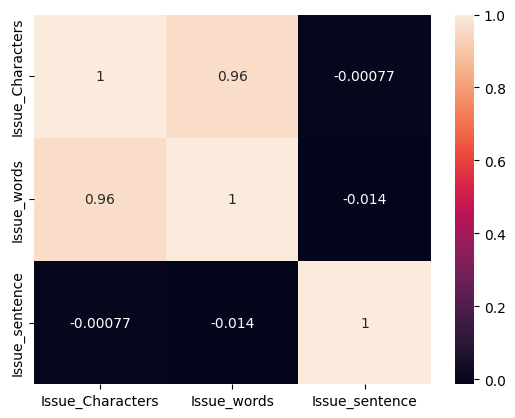

In [142]:
sns.heatmap(TC[['Issue_Characters','Issue_words','Issue_sentence']].corr(),annot=True)

# 3.Text Preprocessing

###Techniques
#### Lowercase
#### Tokenization
#### Removing Special character
#### Removing stop words and punctuation
#### Stemming

In [143]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [145]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [146]:
TC[TC['Categories']=='2'].value_counts().sum()

256328

In [147]:
category_0=TC[TC['Categories']=='0'].iloc[:25000]
category_1=TC[TC['Categories']=='1'].iloc[:25000]
category_2=TC[TC['Categories']=='2'].iloc[:25000]
category_3=TC[TC['Categories']=='3'].iloc[:25000]

In [148]:
import pandas as pd

my_list = category_0

df = pd.DataFrame(my_list, columns=['Issue'])


print(df)


                                                   Issue
0      Problem with a credit reporting company's inve...
1        Problem with a purchase shown on your statement
2                            Improper use of your report
3                 Problem caused by your funds being low
4      Problem with a credit reporting company's inve...
...                                                  ...
27496               Incorrect information on your report
27497                        Improper use of your report
27498                        Improper use of your report
27499                        Improper use of your report
27500                                   Fees or interest

[25000 rows x 1 columns]


In [149]:
import pandas as pd


my_list = category_1


df = pd.DataFrame(my_list, columns=['Issue'])


print(df)


                                                    Issue
11                      Attempts to collect debt not owed
13                      Attempts to collect debt not owed
24                        Written notification about debt
25                      Attempts to collect debt not owed
29                        Written notification about debt
...                                                   ...
244903                  Attempts to collect debt not owed
244906                  Attempts to collect debt not owed
244913  Threatened to contact someone or share informa...
244920                  Attempts to collect debt not owed
244921                    Written notification about debt

[25000 rows x 1 columns]


In [150]:
import pandas as pd

my_list = category_2


df = pd.DataFrame(my_list, columns=['Issue'])

print(df)


                                       Issue
28              Problem when making payments
31      Dealing with your lender or servicer
70        Issue where my lender is my school
109              Struggling to pay your loan
111                            Fraud or scam
...                                      ...
399323  Incorrect information on your report
399349            Managing the loan or lease
399356         Struggling to repay your loan
399362                 Other service problem
399403                         Fraud or scam

[25000 rows x 1 columns]


In [151]:
import pandas as pd


my_list = category_3


df = pd.DataFrame(my_list, columns=['Issue'])

print(df)


                                 Issue
27      Trouble during payment process
34      Trouble during payment process
52      Trouble during payment process
114         Struggling to pay mortgage
251         Struggling to pay mortgage
...                                ...
386817  Trouble during payment process
386821      Struggling to pay mortgage
386823  Trouble during payment process
386825      Struggling to pay mortgage
386826      Struggling to pay mortgage

[25000 rows x 1 columns]


In [152]:
category_1['Issue'].head(5)

11    Attempts to collect debt not owed
13    Attempts to collect debt not owed
24      Written notification about debt
25    Attempts to collect debt not owed
29      Written notification about debt
Name: Issue, dtype: object

In [153]:
import pandas as pd

TC1 = pd.concat([category_0,category_1,category_2,category_3], axis=0)

# TC1 now contains the concatenated DataFrame


In [154]:
TC1.iloc[::10000]

,Categories,Issue,Labels,Issue_Characters,Issue_words,Issue_sentence
0,0,Problem with a credit reporting company's inve...,"Credit Reporting ,repair or other",80,12,1
10824,0,Problem with a company's investigation into an...,"Credit Reporting ,repair or other",63,10,1
21983,0,Problem with a company's investigation into an...,"Credit Reporting ,repair or other",63,10,1
88762,1,Attempts to collect debt not owed,Debt Collection,33,6,1
174455,1,Took or threatened to take negative or legal a...,Debt Collection,51,9,1
28,2,Problem when making payments,Consumer Loan,28,4,1
195724,2,Dealing with my lender or servicer,Consumer Loan,34,6,1
332031,2,Fraud or scam,Consumer Loan,13,3,1
101545,3,"Loan servicing, payments, escrow account",Mortgage,40,7,1
241444,3,"Loan servicing, payments, escrow account",Mortgage,40,7,1


In [155]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text =y[:]
    y.clear()


    for i  in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [156]:
TC1["Issue"]=TC1["Issue"].apply(transform_text)

In [157]:
TC1.sample(25)

,Categories,Issue,Labels,Issue_Characters,Issue_words,Issue_sentence
115973,2,struggl pay loan,Consumer Loan,27,5,1
73999,1,attempt collect debt owe,Debt Collection,33,6,1
13969,0,improp use report,"Credit Reporting ,repair or other",27,5,1
105132,1,attempt collect debt owe,Debt Collection,33,6,1
4461,0,problem compani investig exist problem,"Credit Reporting ,repair or other",63,10,1
221039,1,attempt collect debt owe,Debt Collection,33,6,1
20471,0,incorrect inform report,"Credit Reporting ,repair or other",36,5,1
391299,2,struggl pay loan,Consumer Loan,27,5,1
31857,2,servic problem,Consumer Loan,21,3,1
90009,1,written notif debt,Debt Collection,31,4,1


##generating a word cloud

In [158]:
pip install wordcloud

In [159]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [160]:
c_0 =wc.generate(TC1[TC1['Categories']=='0']["Issue"].str.cat(sep =" "))

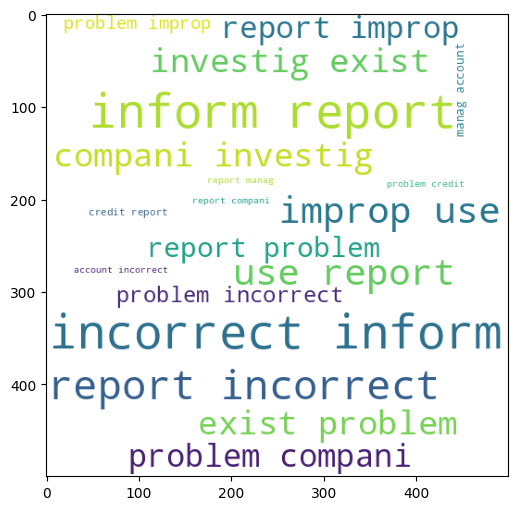

In [161]:
plt.figure(figsize=(15,6))
plt.imshow(c_0)


In [162]:
c_1 =wc.generate(TC1[TC1['Categories']=='1']["Issue"].str.cat(sep =" "))

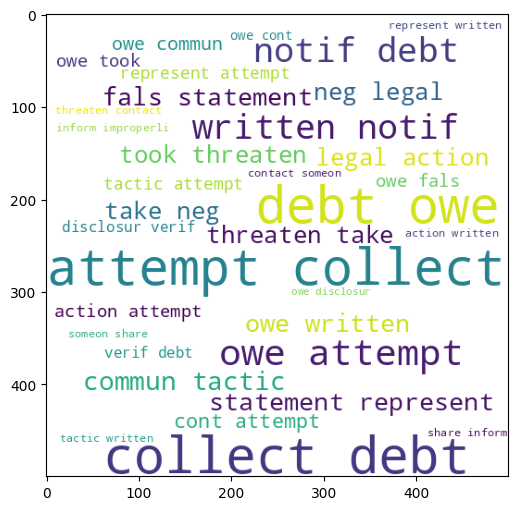

In [163]:
plt.figure(figsize=(15,6))
plt.imshow(c_1)

In [164]:
c_2 =wc.generate(TC1[TC1['Categories']=='2']["Issue"].str.cat(sep =" "))

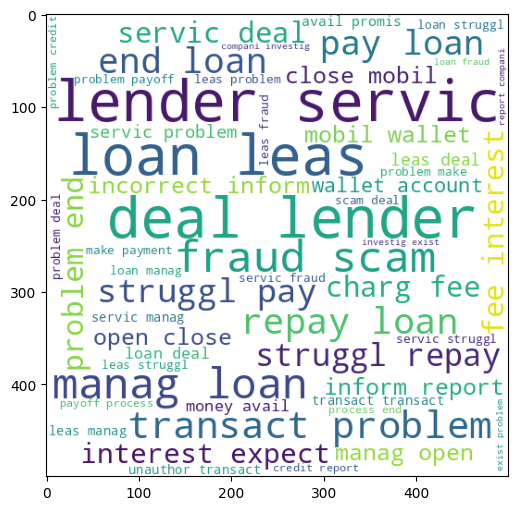

In [165]:
plt.figure(figsize=(15,6))
plt.imshow(c_2)

In [166]:
c_3 =wc.generate(TC1[TC1['Categories']=='3']["Issue"].str.cat(sep =" "))

AxesImage(size=(500, 500))


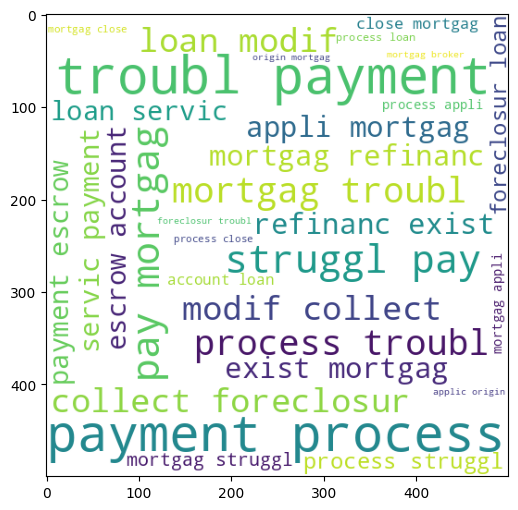

In [167]:
plt.figure(figsize=(15,6))
print(plt.imshow(c_3))

####checking the top 50 words in different categories

In [168]:
c0_corpus=[]
for msg in TC1[TC1['Categories']=='0']["Issue"].tolist():
  for msg in msg.split():
    c0_corpus.append(msg)

c1_corpus=[]
for msg in TC1[TC1['Categories']=='1']["Issue"].tolist():
  for msg in msg.split():
    c1_corpus.append(msg)


c2_corpus=[]
for msg in TC1[TC1['Categories']=='2']["Issue"].tolist():
  for msg in msg.split():
    c2_corpus.append(msg)


c3_corpus=[]
for msg in TC1[TC1['Categories']=='3']["Issue"].tolist():
  for msg in msg.split():
    c3_corpus.append(msg)


In [169]:
print(len(c0_corpus))

86830


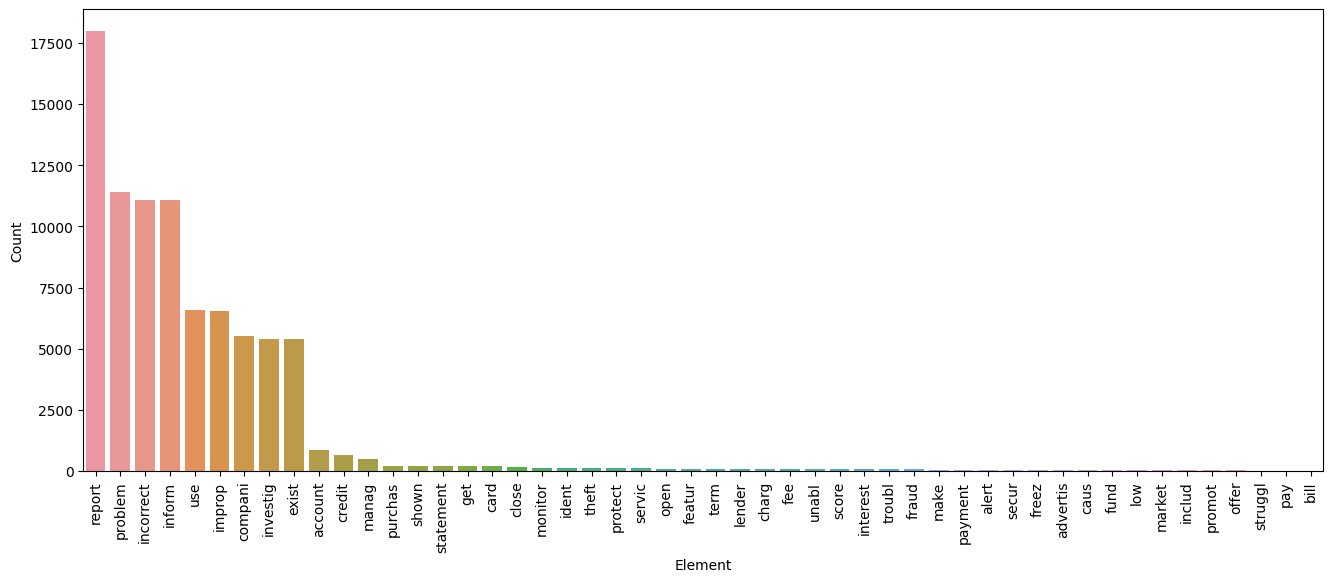

In [170]:
from collections import Counter
pd.DataFrame(Counter(c0_corpus).most_common(30))
data = pd.DataFrame(Counter(c0_corpus).most_common(50), columns=['Element', 'Count'])
plt.figure(figsize=((16,6)))
sns.barplot(x='Element', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()

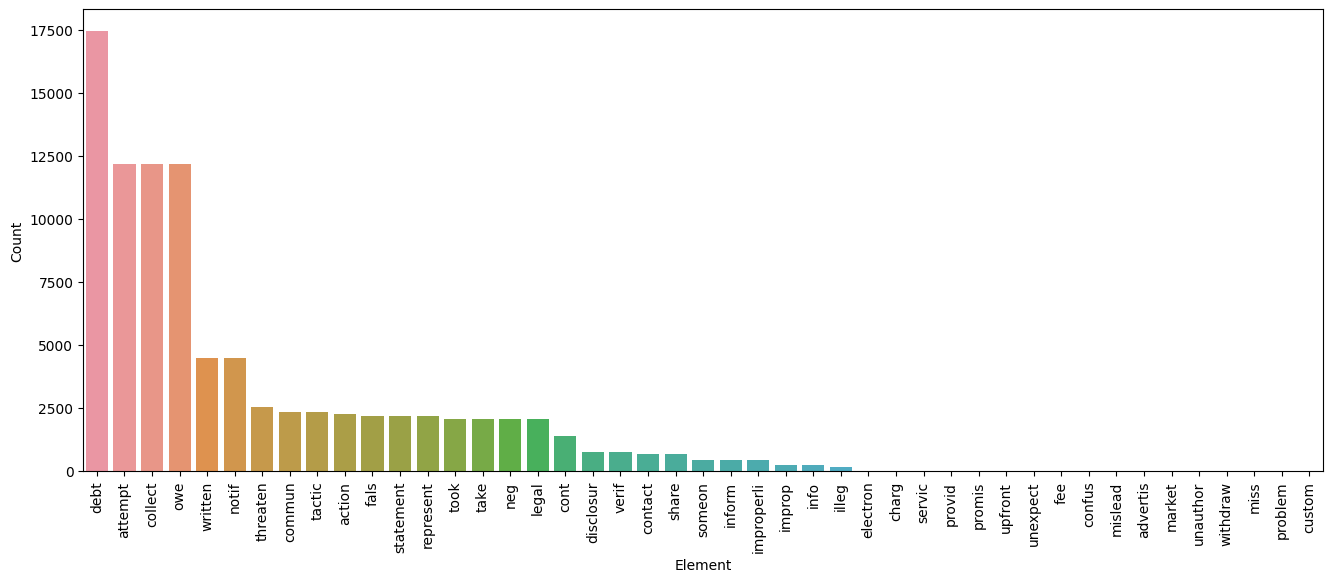

In [171]:
pd.DataFrame(Counter(c1_corpus).most_common(30))
data = pd.DataFrame(Counter(c1_corpus).most_common(50), columns=['Element', 'Count'])
plt.figure(figsize=((16,6)))
sns.barplot(x='Element', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()

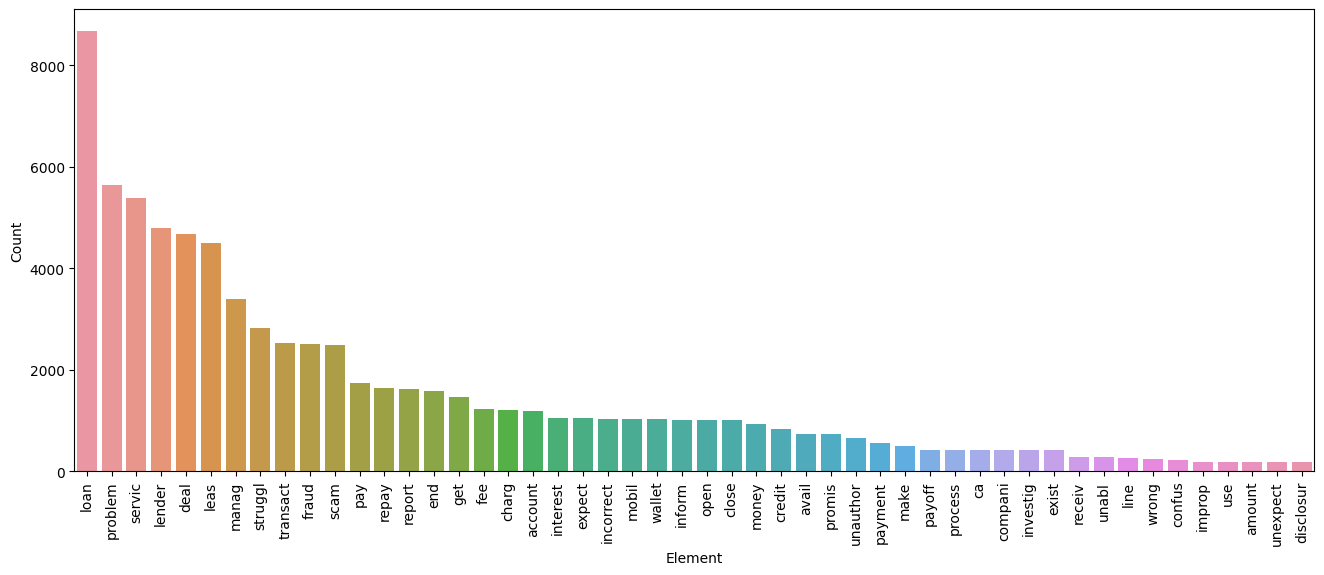

In [172]:
pd.DataFrame(Counter(c2_corpus).most_common(30))
data = pd.DataFrame(Counter(c2_corpus).most_common(50), columns=['Element', 'Count'])
plt.figure(figsize=((16,6)))
sns.barplot(x='Element', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()

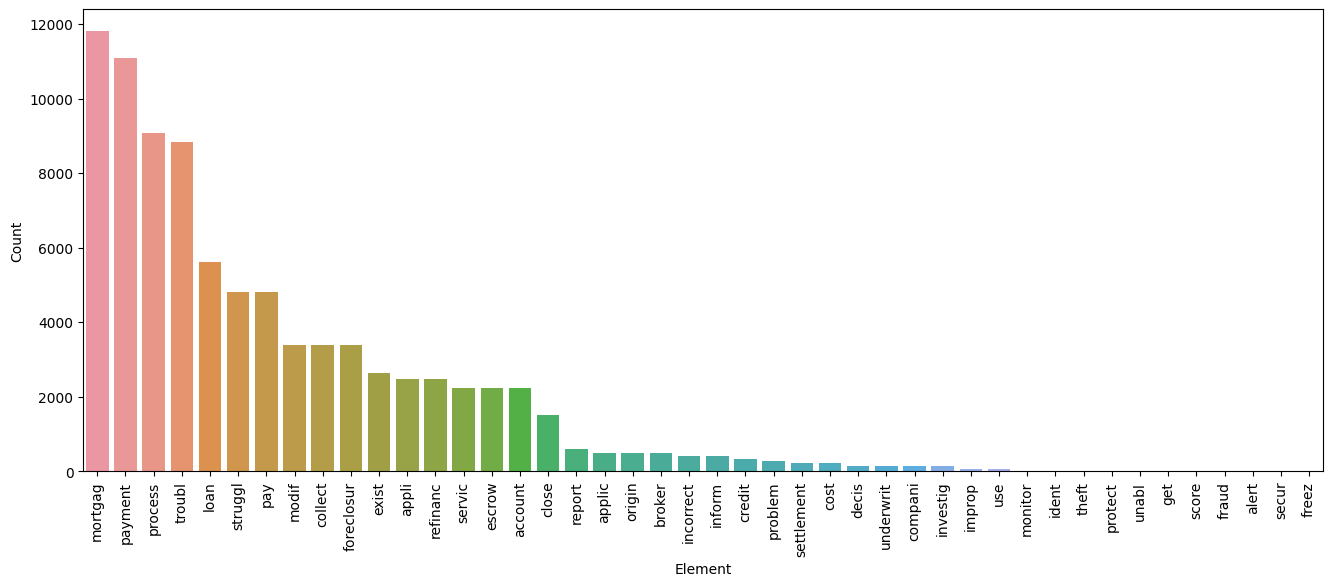

In [173]:
pd.DataFrame(Counter(c3_corpus).most_common(30))
data = pd.DataFrame(Counter(c3_corpus).most_common(50), columns=['Element', 'Count'])
plt.figure(figsize=((16,6)))
sns.barplot(x='Element', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building & Evaluation

## Vectorization


##### Keeping TF-idf vectorizer and GaussianNB for classification

In [174]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=10000)

In [175]:
X=tfidf.fit_transform(TC1['Issue']).toarray()

In [176]:
X.shape

(100000, 153)

In [177]:
y=TC1['Categories'].values

In [178]:
print(y)

['0' '0' '0' ... '3' '3' '3']


In [179]:
y.shape

(100000,)

In [180]:
from sklearn.model_selection import train_test_split


In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix

In [183]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [184]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy score =",accuracy_score(y_test,y_pred1)*100)
print("Precision Score=",precision_score(y_test,y_pred1,average='macro')*100)
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred1))

Accuracy score = 95.48
Precision Score= 95.8400124859264
Confusion Matrix
 [[7548    0    3   52]
 [   0 7493    3    0]
 [ 601    2 6229  515]
 [ 180    0    0 7374]]


In [185]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy score =",accuracy_score(y_test,y_pred2)*100)
print("Precision Score=",precision_score(y_test,y_pred2,average='macro')*100)
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred2))

Accuracy score = 95.00666666666666
Precision Score= 95.05917249350024
Confusion Matrix
 [[7252    0  291   60]
 [   0 7489    7    0]
 [ 464    2 6440  441]
 [ 177    0   56 7321]]


In [186]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy score =",accuracy_score(y_test,y_pred3)*100)
print("Precision Score=",precision_score(y_test,y_pred3,average='macro')*100)
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred3))

Accuracy score = 94.98333333333333
Precision Score= 95.02457367438568
Confusion Matrix
 [[7233    0  310   60]
 [   0 7489    7    0]
 [ 452    2 6452  441]
 [ 175    0   58 7321]]


#5.Multi-classification Models

*  Selection
*  Comparision



In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [188]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb=XGBClassifier(n_estimators=50,random_state=2)

In [189]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'GBDT':gbdt
}

In [190]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)  # Use different variable names here
    precision = precision_score(y_test, y_pred,average='macro')  # Use different variable names here

    return accuracy, precision

# Define lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("for", name)
    print("accuracy =", current_accuracy)
    print("precision =", current_precision)

    # Append scores to the respective lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


for SVC
accuracy = 0.9750333333333333
precision = 0.9765143234042329
for KN
accuracy = 0.9787666666666667
precision = 0.9795765107827843
for NB
accuracy = 0.9500666666666666
precision = 0.9505917249350024
for DT
accuracy = 0.8427666666666667
precision = 0.8898951217212933
for LR
accuracy = 0.9788
precision = 0.9796128650588629
for RF
accuracy = 0.9788333333333333
precision = 0.9796428201582466
for AdaBoost
accuracy = 0.8829666666666667
precision = 0.8854765158941607
for Bgc
accuracy = 0.9788333333333333
precision = 0.9796428201582466
for GBDT
accuracy = 0.9747333333333333
precision = 0.9752747932078918


#6.Prediction

In [191]:

data = [{'Algorithms': name, 'Accuracy': accuracy, 'Precision': precision}
        for name, accuracy, precision in zip(clfs.keys(), accuracy_scores, precision_scores)]

Model_performance = pd.DataFrame(data)

Model_performance.sort_values(by=['Accuracy'],ascending=False)


,Algorithms,Accuracy,Precision
5,RF,0.978833,0.979643
7,Bgc,0.978833,0.979643
4,LR,0.978800,0.979613
1,KN,0.978767,0.979577
0,SVC,0.975033,0.976514
8,GBDT,0.974733,0.975275
2,NB,0.950067,0.950592
6,AdaBoost,0.882967,0.885477
3,DT,0.842767,0.889895
